In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('Existing_Base.csv')

In [47]:
df.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [48]:
df.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average Credit Card Transaction', 'Balance Transfer',
       'Term Deposit', 'Life Insurance', 'Medical Insurance',
       'Average A/C Balance', 'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'gender', 'region', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance'],
      dtype='object')

In [49]:
#Investigate the distribution of the target variable
df['Revenue Grid'].value_counts()

2    9069
1    1086
Name: Revenue Grid, dtype: int64

In [50]:
print((9069/(1086+9069))*100)

89.30576070901034


In [51]:
#The distribution is 89-11 for the target variable which is of slight concern as it might lead to imbalanced dataset

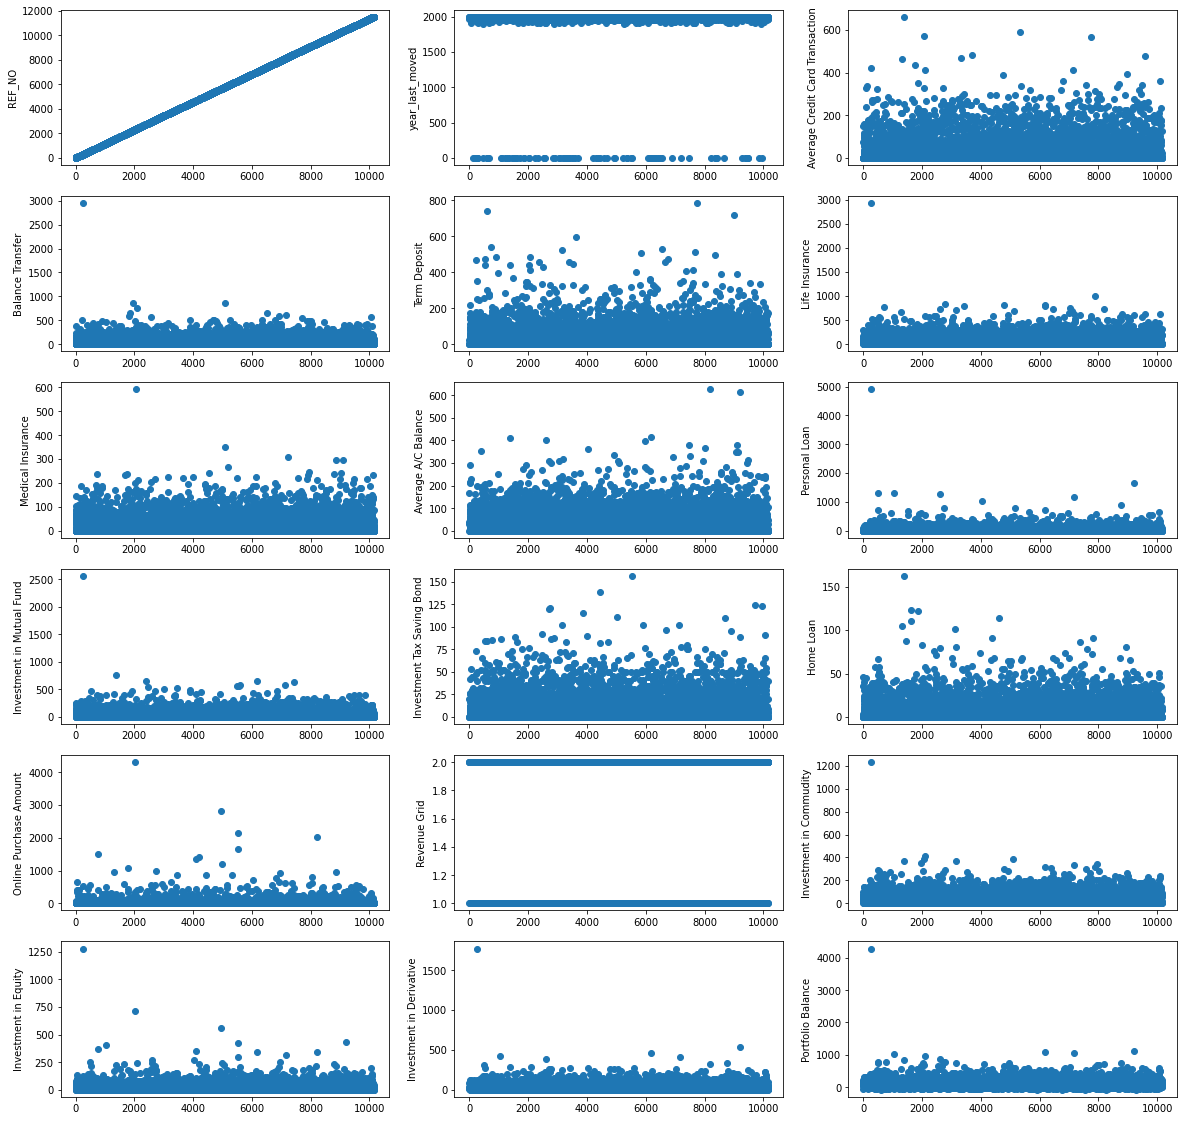

In [52]:
numeric_cols = df.select_dtypes(include=np.number)
categorical_cols = df.select_dtypes(exclude=np.number)

num_col_names = list(numeric_cols.columns)

plot_rows = 6
plot_cols = 3
col_index = 0

fig, ax = plt.subplots(nrows = plot_rows, ncols = plot_cols, figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[num_col_names[col_index]], x = numeric_cols.index)
        ax[row_count][col_count].set_ylabel(num_col_names[col_index])
        col_index+=1

In [53]:
# We can see that the column reference number is actually nothing but incremental row number so we can delete it.
# The column 'year_last_moved' has some entries with 0 which doesnt make sense. So check.
# After checking year_last_moved column, I decided to move the 0 valued rows to the maximum i.e 1997

In [80]:
numeric_cols = numeric_cols.drop(['REF_NO'], axis= 1)

In [66]:
df_year_last_moved_values = df['year_last_moved'].value_counts().to_frame()

In [67]:
pd.set_option('display.max_rows', 100)
df_year_last_moved_values

,year_last_moved
1997,764
1996,654
1994,542
1998,538
1995,492
1988,423
1993,406
1986,387
1992,372
1987,356


In [64]:
def alterYearLastMoved(year):
    if year == 0:
        return 1997
    else:
        return year

df['year_last_moved'] = df.apply(lambda x: alterYearLastMoved(x['year_last_moved']), axis=1)

In [68]:
# Manipulating the categorical columns


In [69]:
categorical_cols

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,post_code,post_area,gender,region
0,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,HTV,NP4 9HS,NP4,Female,Wales
1,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,Granada,M41 0QH,M41,Female,North West
2,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,Tyne Tees,NE30 1JZ,NE30,Male,North
3,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,Central,HR9 7RJ,HR9,Female,West Midlands
4,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,Scottish TV,KA10 7LS,KA10,Female,Scotland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,1,45-50,Partner,Secretarial/Admin,Manual Worker,Own Home,"<30,000, >=27,500",No,No,Carlton,SM4 5RF,SM4,Female,South East
10151,Zero,45-50,Partner,Manual Worker,Manual Worker,Rent from Council/HA,"<25,000, >=22,500",No,No,Meridian,RG14 7PA,RG14,Female,South East
10152,2,41-45,Partner,Housewife,Professional,Own Home,">=35,000",No,No,Central,OX15 0PU,OX15,Female,South East
10153,Zero,51-55,Partner,Other,Manual Worker,Own Home,"<10,000, >= 8,000",No,Yes,Carlton,CM15 0LU,CM15,Female,South East


In [70]:
categorical_cols['age_band'].value_counts()

45-50      1359
36-40      1134
41-45      1112
31-35      1061
51-55      1052
55-60      1047
26-30       927
61-65       881
65-70       598
22-25       456
71+         410
18-21        63
Unknown      55
Name: age_band, dtype: int64

In [71]:
#check family_income, TVarea, age_band
# Drop post_code, post_area

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [76]:
label_encoding_cols = ['age_band', 'children', 'occupation', 'status', 'occupation_partner', 'home_status', 'family_income', 'self_employed', 'self_employed_partner', 'TVarea', 'gender', 'region' ]
encoded_categorical_cols = categorical_cols[label_encoding_cols].apply(le.fit_transform)

In [81]:
new_df = pd.concat([numeric_cols, encoded_categorical_cols], axis = 1)

In [90]:
new_df['Revenue Grid'].value_counts()

0    9069
1    1086
Name: Revenue Grid, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split

In [88]:
def alterTarget(val):
    if val == 2:
        return 0
    else:
        return 1

In [89]:
new_df['Revenue Grid'] = new_df.apply(lambda x: alterTarget(x['Revenue Grid']), axis=1)

In [91]:
y = new_df['Revenue Grid']
X = new_df.drop(['Revenue Grid'], axis=1)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [96]:
from sklearn.linear_model import LogisticRegressionCV

In [100]:
lr_model = LogisticRegressionCV(max_iter=10000)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

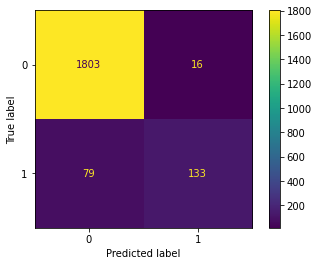

In [103]:
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
cmDisplay.plot()

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)
y_pred_dtree = dtree_model.predict(X_test)

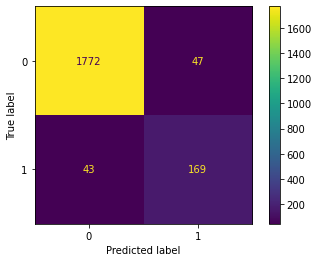

In [107]:
cm_dtree = confusion_matrix(y_test, y_pred_dtree, labels=dtree_model.classes_)
cmDisplay_dtree = ConfusionMatrixDisplay(confusion_matrix=cm_dtree, display_labels=dtree_model.classes_)
cmDisplay_dtree.plot()

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

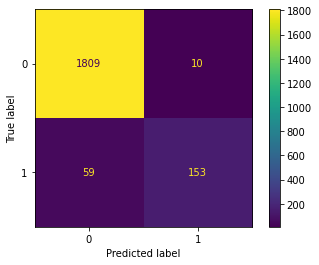

In [110]:
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
cmDisplay_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
cmDisplay_rf.plot()

In [ ]:
# We can see that plain vanilla Random Forest Model is giving the best results